In [2]:
import pathlib as pl
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#TODO: convert to dictionaries with filename as key
original_poles = [str(photo) for photo in sorted(pl.Path('../data/original_poles').glob('*.jpg'))]
original_midspans = [str(photo) for photo in sorted(pl.Path('../data/original_midspan').glob('*.jpg'))]
annotated_poles = [str(photo) for photo in sorted(pl.Path('../data/annotated_pole').glob('*.jpg'))]
annotated_midspans = [str(photo) for photo in sorted(pl.Path('../data/annotated_midspan').glob('*.jpg'))]

In [4]:
sample_pole = cv2.imread(original_poles[60])
sample_pole_gray = cv2.cvtColor(sample_pole, cv2.COLOR_BGR2GRAY)
sample_pole_blurred = cv2.GaussianBlur(sample_pole_gray, (15, 15), 0)
sample_midspan = cv2.imread(original_midspans[75])
sample_midspan_gray = cv2.cvtColor(sample_midspan, cv2.COLOR_BGR2GRAY)
sample_midspan_blurred = cv2.GaussianBlur(sample_midspan_gray, (15, 15), 0)

# Project Overview

This notebook will attempt to outline the research goals of this project, specifically ones I define as successful applications of computer vision and photogrammetry as applied to utility pole surveying:
* Feature detection of the measuring sticks
* Calibration of the measuring stick heights
* Feature detection of the utility poles
* Verification of the pole heights (top of pole)
* Feature detection of cables, both on pole and at midspan
* Verification of cable heights, both on pole and at midspan

The accomplishment of all these goals, I admit, is an ambitious goal for this project, and as such, I must be realistic about what I can accomplish in the limited time I have. I also must remember to recognize whatever progress I'm able to make towards these objectives, remembering that each is a crucial building block to the next step.

By laying out each goal here and the requirements needed to be successful, I seek to maintain that perspective while staying focused on the most important goal for the project, which is to conduct a complete data science process and apply my new skills.

Below are representative images of a typical utility pole and cable midspan being surveyed with a measuring stick. I will used these to illustrate the outcomes of each goal.

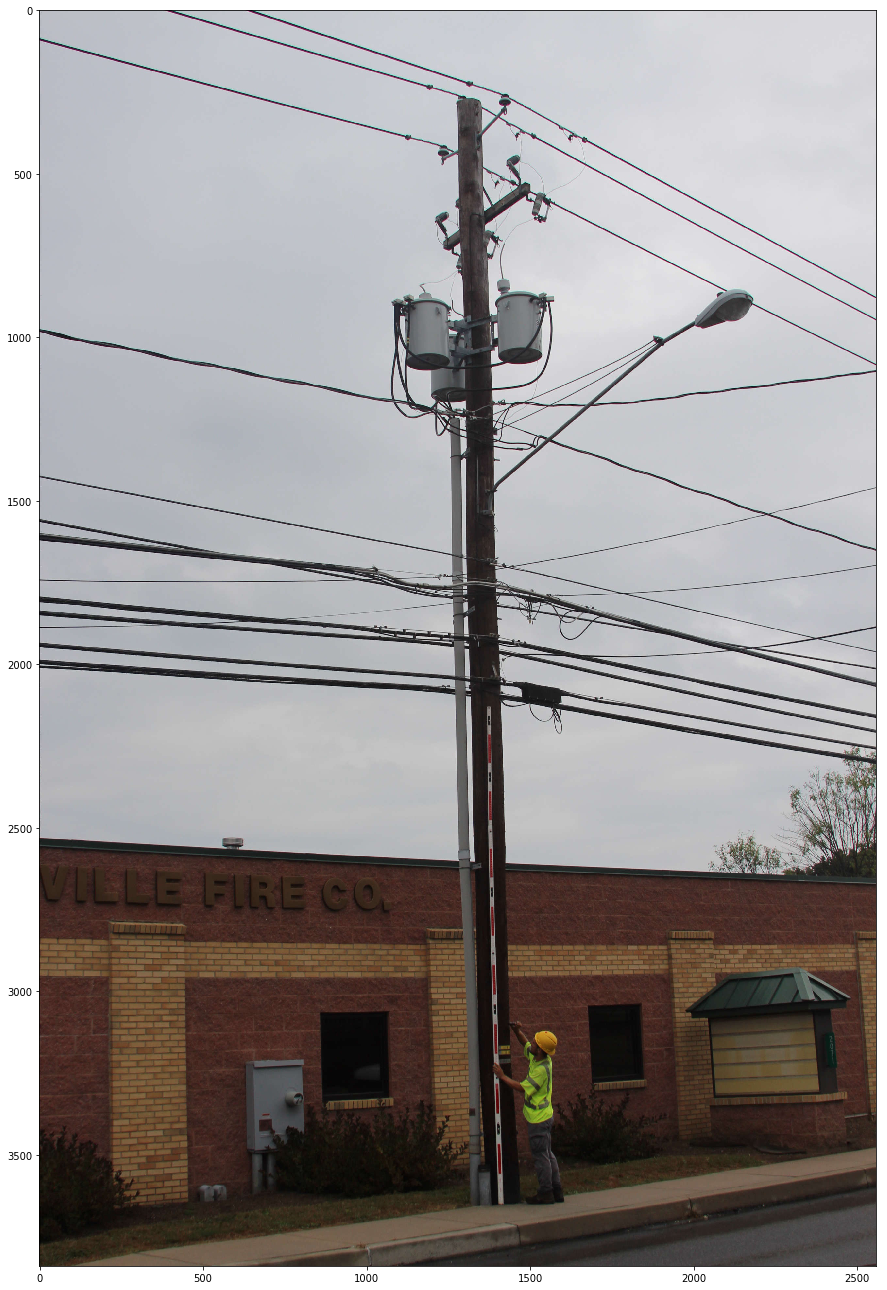

In [5]:
fig = plt.figure(figsize=(15, 30))
plt.imshow(cv2.cvtColor(sample_pole, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
fig = plt.figure(figsize=(15, 30))
plt.imshow(cv2.cvtColor(sample_midspan, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# We're writing out our sample files to perform separate tests on them
cv2.imwrite("../data/tests/sample_pole.png", sample_pole)
cv2.imwrite("../data/tests/sample_midspan.png", sample_midspan)

True